In [1]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639238 sha256=6a7cc87efc686d8ad45b77246d3374f42e42e7ca7a29a7c5d5867615371e99e7
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
!pip install statsmodels

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller

In [4]:
data_url = 'https://github.com/chileesuccess/hamoyeInternship/blob/main/stageE/dataset/Time_series_analysis_and_forecast_DATASET.csv?raw=true'

In [5]:
data_df = pd.read_csv(data_url)

In [6]:
data_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [7]:
data_df.shape

(92016, 5)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [9]:
# convert the 'FullDate' column to a datetime type

data_df['FullDate'] = pd.to_datetime(data_df['FullDate'])

In [10]:
data_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [12]:
data_df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [13]:
data_df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [14]:
# Resetting the index of the dataset to 'Fulldate'

data_df = data_df.set_index('FullDate')

data_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [15]:
# Resampling to daily sampling rate
data_daily_df = data_df.resample('D').sum()

data_daily_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [16]:
data_daily_df.shape

(3834, 4)

## Question 11

Text(0.5, 1.0, 'Plot of Electricity Price vs Datetime')

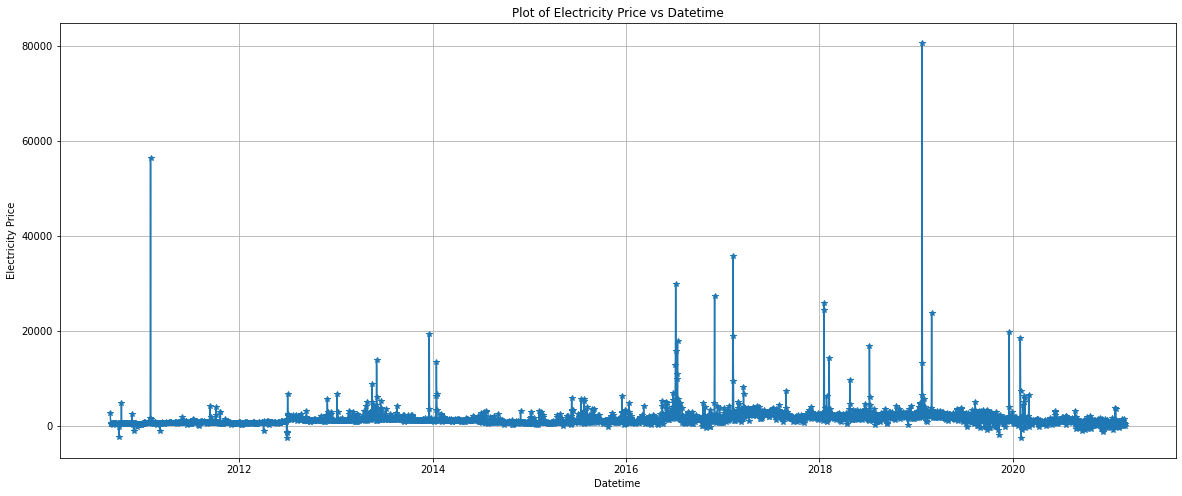

In [17]:
x = data_daily_df.index
y = data_daily_df.ElecPrice

plt.figure(figsize=(20,8))
plt.plot(x, y, marker='*')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('Electricity Price')
plt.title('Plot of Electricity Price vs Datetime')

Text(0.5, 1.0, 'Plot of Gas Price vs Datetime')

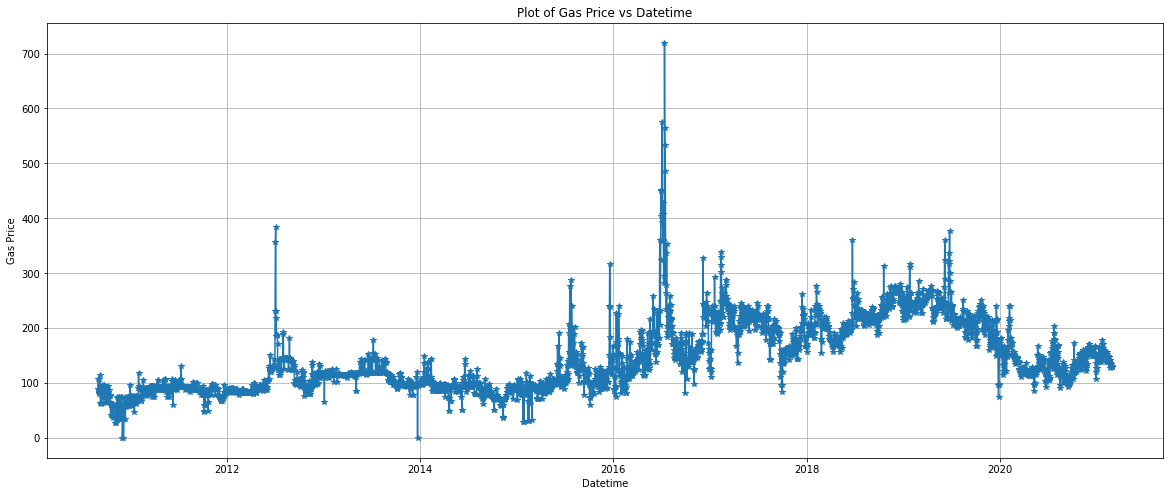

In [18]:
x = data_daily_df.index
y = data_daily_df.GasPrice

plt.figure(figsize=(20,8))
plt.plot(x, y, marker='*')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('Gas Price')
plt.title('Plot of Gas Price vs Datetime')

## Question 12

In [59]:
adf_sysload = adfuller(data_daily_df.SysLoad)
print(f'p-value of SysLoad: {round(adf_sysload[1],6)}')

p-value of SysLoad: 0.004254


In [60]:
adf_gas = adfuller(data_daily_df.GasPrice)
print(f'p-value of GasPrice: {round(adf_gas[1],6)}')

p-value of GasPrice: 0.045027


## Question 13

In [61]:
print(f'ADF Statistic: {adf_gas[0]}')
print('Critical Values :')

for k, v in adf_gas[4].items():
 print(f'{k} : {round(v,4)}')

ADF Statistic: -2.90276669716518
Critical Values :
1% : -3.4321
5% : -2.8623
10% : -2.5672


In [62]:
print(f'ADF Statistic: {adf_sysload[0]}')
print('Critical Values :')

for k, v in adf_sysload[4].items():
 print(f'{k} : {round(v,4)}')

ADF Statistic: -3.6901589888366457
Critical Values :
1% : -3.4321
5% : -2.8623
10% : -2.5672


In [19]:
# Splitting daily sample of the dataset into train and test sets

train_data = data_daily_df.iloc[:2757,:]

test_data = data_daily_df.iloc[2757:,:]

In [20]:
train_data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [21]:
train_data.shape

(2757, 4)

In [22]:
test_data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2018-03-20,540.0,7696.91130,201.5880,1833.00
2018-03-21,571.2,4658.05865,203.2560,1730.49
2018-03-22,722.4,19161.78525,203.2560,2260.55
2018-03-23,811.2,18090.43435,198.6456,2138.76
2018-03-24,832.8,3763.53865,180.2160,1721.70


In [23]:
test_data.shape

(1077, 4)

In [24]:
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [25]:
train_data.rename(columns={'FullDate':'ds', 'ElecPrice':'y'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
train_data.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [27]:
test_data.reset_index(inplace = True)

test_data.rename(columns={'FullDate':'ds', 'ElecPrice':'y'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
test_data.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [29]:
def mape(Y_actual,Y_Predicted):
    return np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100

## Questions 14 - 16

## Univariate Model Training

In [30]:
train1 = train_data[['ds', 'y']]
test1 = test_data[['ds', 'y']]

In [31]:
model1 = Prophet()
model1.fit(train1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
forecast1 = model1.predict(test1) 
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,186.851503,4948.332620,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,96.577048,5050.675818,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,248.171639,5283.537786,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,233.200120,5150.387755,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-245.298772,4738.778608,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


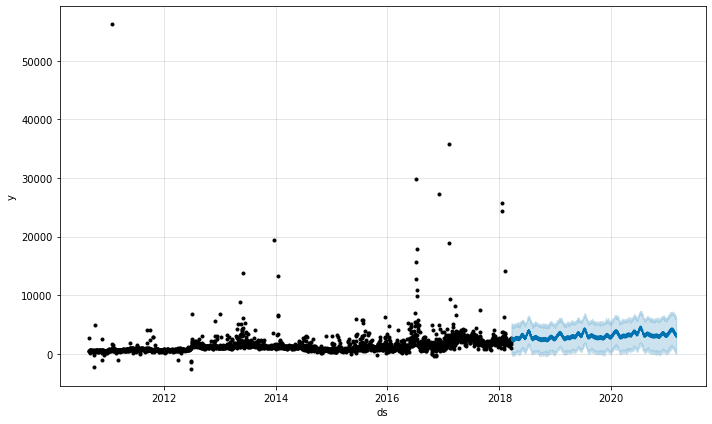

In [33]:
model1.plot(forecast1)
plt.show()

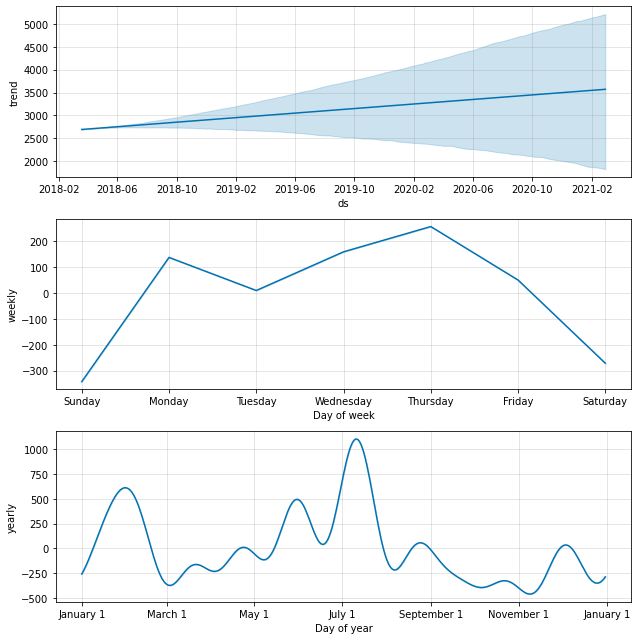

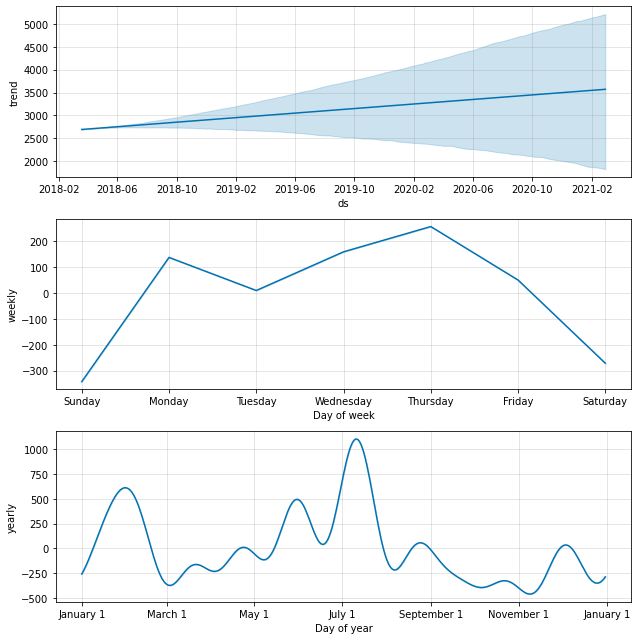

In [34]:
model1.plot_components(forecast1)

In [35]:
MAPE1 = mape(test1['y'],forecast1['yhat'])
print(f'MAPE: {round(MAPE1,2)}')

MAPE: 549.48


In [36]:
RMSE1 = np.sqrt(metrics.mean_squared_error(test1['y'],forecast1['yhat']))
round(RMSE1,4)

3218.1558

## Questions 17 - 20

## Multivariate Model Training

In [37]:
train_data.rename(columns={'SysLoad':'add1','Tmax':'add2', 'GasPrice':'add3'}, inplace=True)

train_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [38]:
test_data.rename(columns={'SysLoad':'add1','Tmax':'add2', 'GasPrice':'add3'}, inplace=True)

test_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ds,add2,add1,add3,y
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [39]:
model2 = Prophet()

model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [40]:
model2.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
forecast2 = model2.predict(test_data) 
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1866.664112,-353.525786,4015.040313,1866.664112,1866.664112,-856.577763,-856.577763,-856.577763,0.237860,...,-84.512848,-84.512848,-84.512848,-39.104444,-39.104444,-39.104444,0.0,0.0,0.0,1985.365644
1,2018-03-21,1867.349885,-117.643814,4322.478467,1867.349885,1867.349885,-1026.630461,-1026.630461,-1026.630461,0.235038,...,42.515562,42.515562,42.515562,-29.837843,-29.837843,-29.837843,0.0,0.0,0.0,1976.703318
2,2018-03-22,1868.035658,741.933860,5077.099532,1868.035658,1868.035658,-215.009060,-215.009060,-215.009060,0.221364,...,145.604343,145.604343,145.604343,-24.826777,-24.826777,-24.826777,0.0,0.0,0.0,2897.096666
3,2018-03-23,1868.721432,279.209727,4848.558572,1868.721432,1868.721432,-274.961329,-274.961329,-274.961329,0.213332,...,-44.332801,-44.332801,-44.332801,-23.929622,-23.929622,-23.929622,0.0,0.0,0.0,2581.305545
4,2018-03-24,1869.407205,-686.107947,3484.666969,1869.407205,1869.407205,-1076.687360,-1076.687360,-1076.687360,0.211379,...,-117.513591,-117.513591,-117.513591,-26.895380,-26.895380,-26.895380,0.0,0.0,0.0,1434.385996


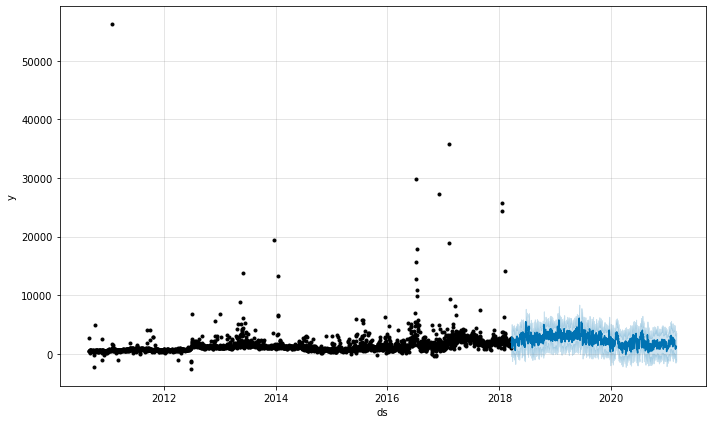

In [42]:
model2.plot(forecast2)
plt.show()

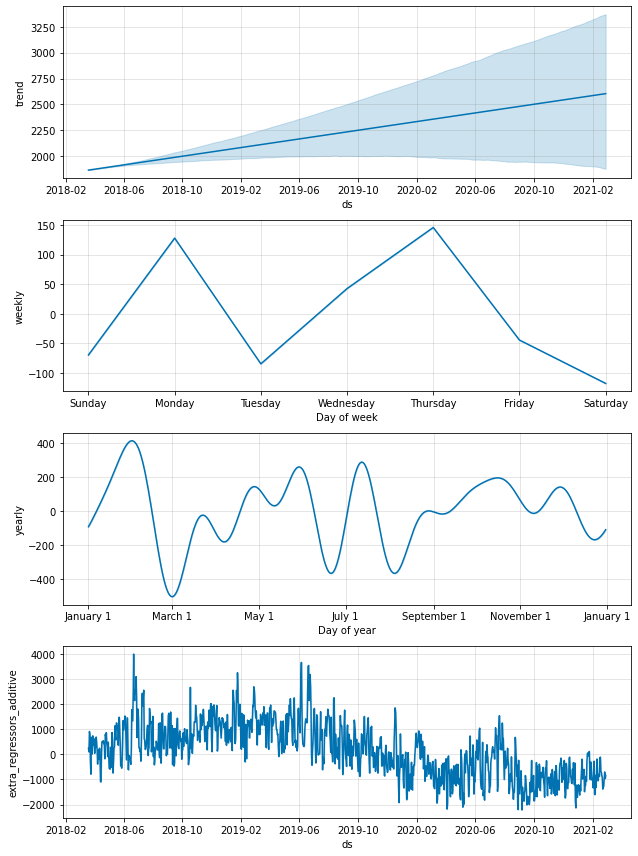

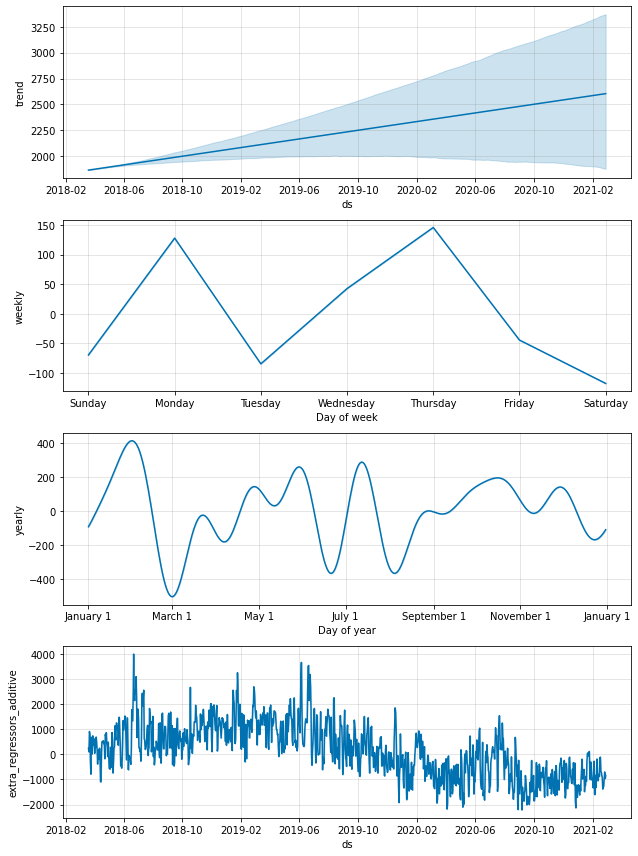

In [43]:
model2.plot_components(forecast2)

In [44]:
MAPE2 = mape(test_data['y'],forecast2['yhat'])
print(f'MAPE: {round(MAPE2,2)}')

MAPE: 231.28


In [45]:
RMSE2 = np.sqrt(metrics.mean_squared_error(test_data['y'],forecast2['yhat']))
round(RMSE2,4)

2706.9157

In [46]:
model3 = Prophet()

model3.add_regressor('add1')
model3.add_regressor('add3')

In [47]:
model3.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
forecast3 = model3.predict(test_data) 
forecast3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1871.211040,-270.646071,4228.075703,1871.211040,1871.211040,-856.603121,-856.603121,-856.603121,1098.871250,...,-84.259077,-84.259077,-84.259077,-39.110445,-39.110445,-39.110445,0.0,0.0,0.0,1990.109647
1,2018-03-21,1871.907673,-112.397337,4200.930153,1871.907673,1871.907673,-1026.660854,-1026.660854,-1026.660854,1123.288383,...,42.767881,42.767881,42.767881,-29.814902,-29.814902,-29.814902,0.0,0.0,0.0,1981.488181
2,2018-03-22,1872.604305,625.926746,5184.669376,1872.604305,1872.604305,-215.015425,-215.015425,-215.015425,1123.288383,...,145.302341,145.302341,145.302341,-24.771961,-24.771961,-24.771961,0.0,0.0,0.0,2901.407643
3,2018-03-23,1873.300938,330.799289,4748.162769,1873.300938,1873.300938,-274.969469,-274.969469,-274.969469,1055.798726,...,-44.086683,-44.086683,-44.086683,-23.840330,-23.840330,-23.840330,0.0,0.0,0.0,2586.203182
4,2018-03-24,1873.997570,-853.497989,3537.818268,1873.997570,1873.997570,-1076.719235,-1076.719235,-1076.719235,786.015761,...,-117.847877,-117.847877,-117.847877,-26.769447,-26.769447,-26.769447,0.0,0.0,0.0,1438.676772


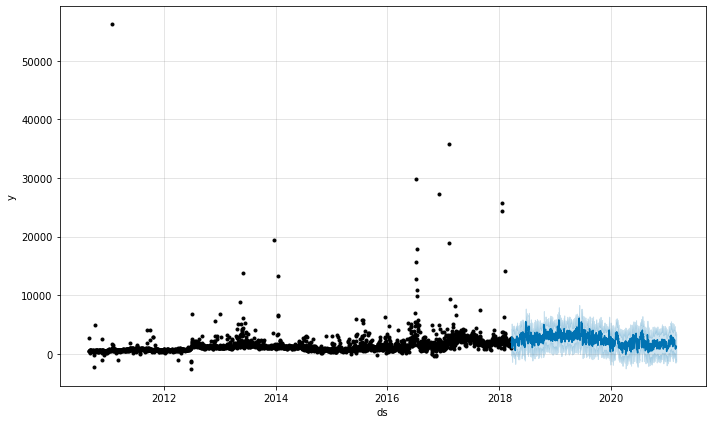

In [49]:
model3.plot(forecast3)
plt.show()

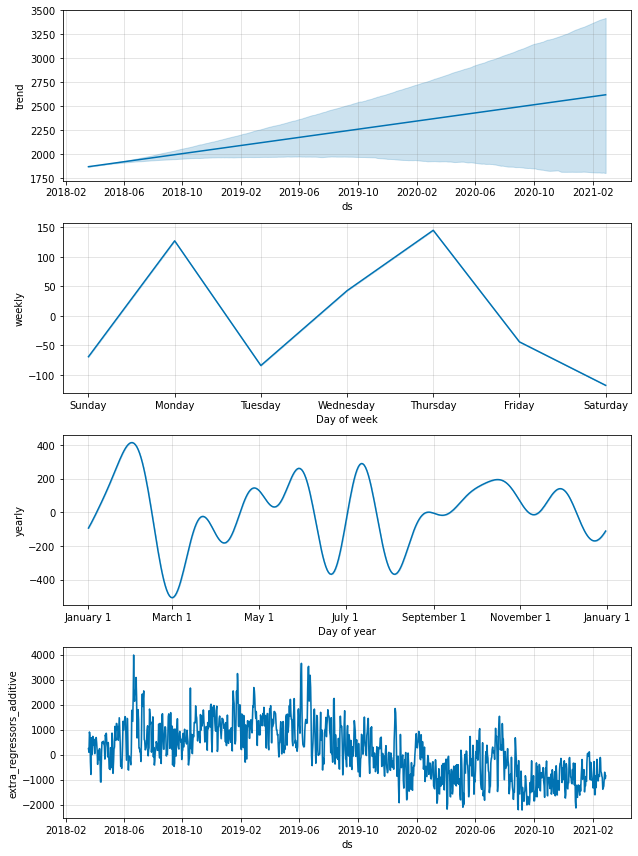

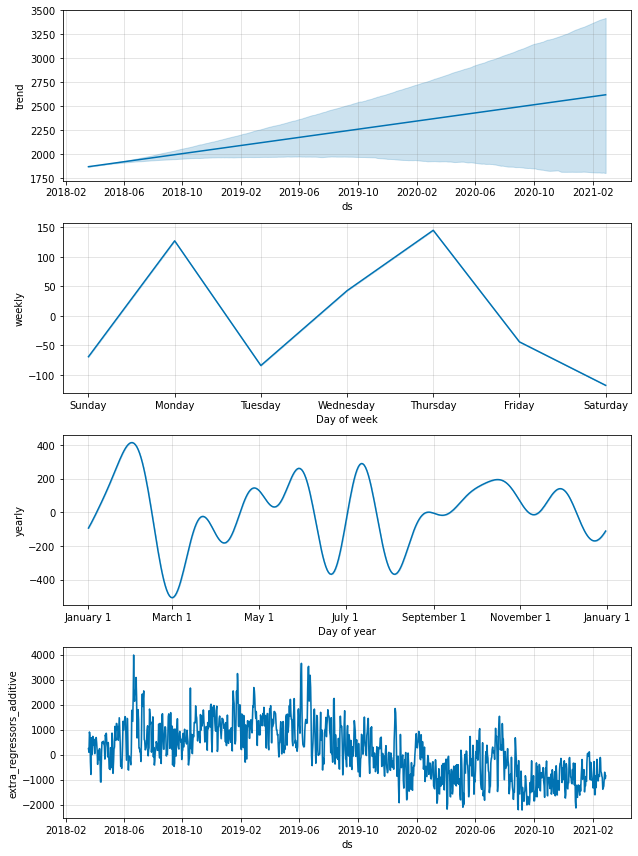

In [50]:
model3.plot_components(forecast3)

In [55]:
MAPE3 = mape(test_data['y'],forecast3['yhat'])
print(f'MAPE: {round(MAPE3,2)}')

MAPE: 233.72


In [52]:
RMSE3 = np.sqrt(metrics.mean_squared_error(test_data['y'],forecast3['yhat']))
round(RMSE3,4)

2709.73